##### Oct 24th, 2022 [OI] 

## Design of Experimen: Hierarchical Latin Hypercube Sampling via Maximin and Centered Constraints 

In [13]:
import numpy as np 
from scipy.stats import qmc
from skopt.sampler import Lhs
from skopt.space import Space
from tools.HLHS import LHS_extendable, check_if_in_set
import matplotlib.pyplot as plt

import matplotlib
font = {'family' : 'serif',
        'size'   : 15}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

### *1D Example*

In [2]:
# define 1D uniform [0, 1] sampler to be LHS
space1d = Space([(0., 1.)])
lhs1d = LHS_extendable(criterion="maximin", iterations=10000)

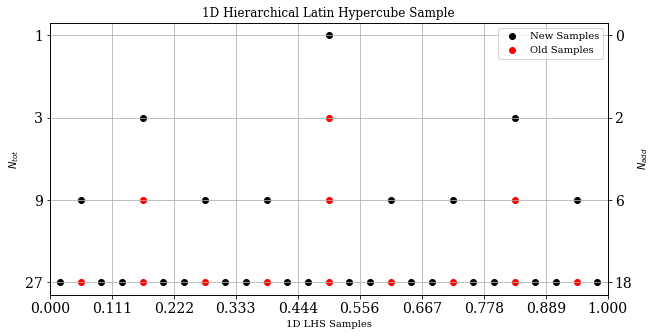

In [3]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(lhs1d.generate(space1d.dimensions, 1), 1, c="k")

Nold = 1

samples_old = lhs1d.generate(space1d.dimensions, 1)

for r in range(2, 5):
    # update Nold
    Nold = 3*Nold
    # sample again
    samples_new = lhs1d.generate(space1d.dimensions, Nold, existing_samples = np.array(samples_old))
    for sample in samples_new:
        if sample in samples_old:
            _ = ax.scatter(sample, r, c="r")
        else:
            _ = ax.scatter(sample, r, c="k")
    samples_old = samples_new
            
_ = ax.scatter(None, None, c="k", label="New Samples")
_ = ax.scatter(None, None, c="r", label="Old Samples")
_ = plt.gca().invert_yaxis()
_ = plt.legend()
_ = ax.set_xlim(0, 1)

_ = ax2 = ax.twinx()
_ = ax2.set_ylabel("$N_{add}$")
_ = ax2.set_ylim(ax.get_ylim())
_ = ax2.set_yticks([4, 3, 2, 1])
_ = ax2.set_yticklabels(["18", "6", "2", "0"])

_ = ax.set_xticks(np.linspace(0, 1, 10))
_ = ax.set_yticks([1, 2, 3, 4])
_ = ax.set_yticklabels(["1", "3", "9", "27"])
_ = ax.grid(axis="y")
_ = ax.grid(axis="x")
_ = ax.set_ylabel("$N_{tot}$")
_ = ax.set_xlabel("1D LHS Samples")
_ = ax.set_title("1D Hierarchical Latin Hypercube Sample")
plt.savefig("../figs/hlhs_1d.png", dpi=500)

### *2D Example*

In [4]:
# define 2D uniform [0, 1] sampler to be LHS
space2d = Space([(0., 1.), (0., 1.)])
lhs2d = LHS_extendable(criterion="maximin", iterations=10000)

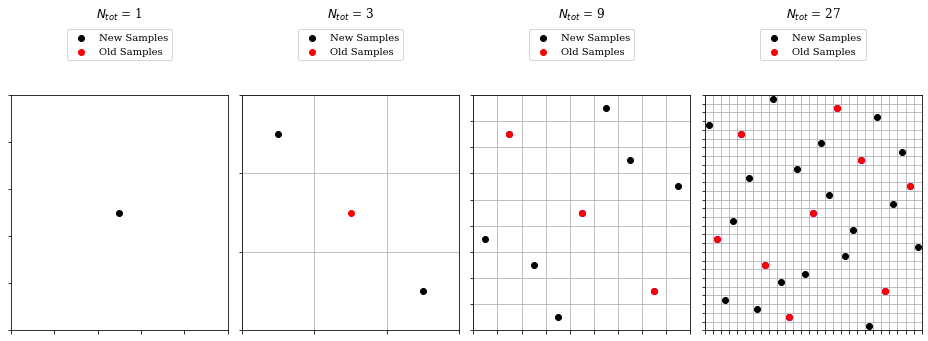

In [5]:
fig, ax = plt.subplots(ncols=4, figsize=(13, 5))

sample = lhs2d.generate(space2d.dimensions, 1)[0]
ax[0].scatter(sample[0],sample[1], c="k")
ax[0].set_title("$N_{tot}$ = 1", y=1.3)
ax[0].set_xlim(0, 1)
ax[0].set_ylim(0, 1)
_ = ax[0].set_xticklabels([])
_ = ax[0].set_yticklabels([])

Nold = 1
 
samples_old = lhs2d.generate(space2d.dimensions, 1)

for r in range(2, 5):
    # update Nold
    Nold = 3*Nold
    # sample again
    samples_new = lhs2d.generate(space2d.dimensions, Nold, existing_samples = np.array(samples_old))
    
    for sample in samples_new:
        if check_if_in_set(sample, np.array(samples_old)):
            _ = ax[r-1].scatter(sample[0],sample[1], c="r")
            if r < 4:
                _ = ax[r].scatter(sample[0],sample[1], c="b")
        else:
            _ = ax[r-1].scatter(sample[0],sample[1], c="k")
            if r < 4:
                _ = ax[r].scatter(sample[0],sample[1], c="b")
    samples_old = samples_new

    _ = ax[r-1].set_xlim(0, 1)
    _ = ax[r-1].set_ylim(0, 1)
    _ = ax[r-1].set_xticks(np.linspace(0, 1, Nold+1))
    _ = ax[r-1].set_yticks(np.linspace(0, 1, Nold+1))
    _ = ax[r-1].grid(axis="y")
    _ = ax[r-1].grid(axis="x")
    _ = ax[r-1].set_xticklabels([])
    _ = ax[r-1].set_yticklabels([])
    _ = ax[r-1].set_title("$N_{tot}$ = "+ str(Nold), y=1.3)
    _ = ax[r-1].scatter(None, None, c="k", label="New Samples")
    _ = ax[r-1].scatter(None, None, c="r", label="Old Samples")
    _ = ax[r-1].legend(loc='upper center', ncol=1, bbox_to_anchor=(0.5, 1.3))
            
_ = ax[0].scatter(None, None, c="k", label="New Samples")
_ = ax[0].scatter(None, None, c="r", label="Old Samples")
_ = ax[0].legend(loc='upper center', ncol=1, bbox_to_anchor=(0.5, 1.3))

plt.tight_layout()
plt.savefig("../figs/hlhs_2d.png", dpi=500)


### *5D Example*

In [7]:
# define 2D uniform [0, 1] sampler to be LHS
space5d = Space([(0., 1.), (0., 1.), (0., 1.), (0., 1.), (0., 1.)])
lhs5d = LHS_extendable(criterion="maximin", iterations=500)

*first run $N_{1}=200$*

*second level $N_{2}=600$*

*third level $N_{3}=1800$*

In [16]:
sample1 = np.array(lhs5d.generate(space5d.dimensions, 200))
# lower and upper bounds
l_bounds = [0.2, 1E-2, 1E-2, 1E-1, 1E-1]
u_bounds = [1.5, 1E2, 1E2, 1E1, 1E1]

# scale and sample using Latin Hypercube Sampling (LHS)
sample1 = qmc.scale(sample=sample1,
                   l_bounds=l_bounds,
                   u_bounds=u_bounds)
np.save(file="data/samples200", arr=sample)

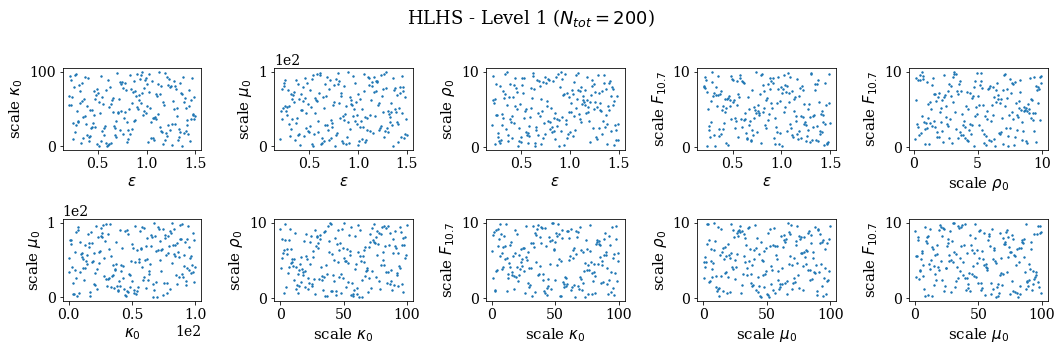

In [19]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(15, 5))
ax[0, 0].scatter(sample1[:, 0], sample1[:, 1], s=2)
ax[0, 0].set_xlabel(r"$\epsilon$")
ax[0, 0].set_ylabel(r"scale $\kappa_{0}$")

ax[0, 1].scatter(sample1[:, 0], sample1[:, 2], s=2)
ax[0, 1].set_xlabel(r"$\epsilon$")
ax[0, 1].set_ylabel(r"scale $\mu_{0}$")
ax[0, 1].ticklabel_format(axis='both', style='sci', scilimits=(0,0))

ax[0, 2].scatter(sample1[:, 0], sample1[:, 3], s=2)
ax[0, 2].set_xlabel(r"$\epsilon$")
ax[0, 2].set_ylabel(r"scale $\rho_{0}$")

ax[0, 3].scatter(sample1[:, 0], sample1[:, 4], s=2)
ax[0, 3].set_xlabel(r"$\epsilon$")
ax[0, 3].set_ylabel(r"scale $F_{10.7}$")

ax[1, 0].scatter(sample1[:, 1], sample1[:, 2], s=2)
ax[1, 0].set_xlabel(r"$\kappa_{0}$")
ax[1, 0].set_ylabel(r"scale $\mu_{0}$")
ax[1, 0].ticklabel_format(axis='both', style='sci', scilimits=(0,0))

ax[1, 1].scatter(sample1[:, 1], sample1[:, 3], s=2)
ax[1, 1].set_xlabel(r"scale $\kappa_{0}$")
ax[1, 1].set_ylabel(r"scale $\rho_{0}$")

ax[1, 2].scatter(sample1[:, 1], sample1[:, 4], s=2)
ax[1, 2].set_xlabel(r"scale $\kappa_{0}$")
ax[1, 2].set_ylabel(r"scale $F_{10.7}$")

ax[1, 3].scatter(sample1[:, 2], sample1[:, 3], s=2)
ax[1, 3].set_xlabel(r"scale $\mu_{0}$")
ax[1, 3].set_ylabel(r"scale $\rho_{0}$")

ax[1, 4].scatter(sample1[:, 2], sample1[:, 4], s=2)
ax[1, 4].set_xlabel(r"scale $\mu_{0}$")
ax[1, 4].set_ylabel(r"scale $F_{10.7}$")

ax[0, 4].scatter(sample1[:, 3], sample1[:, 4], s=2)
ax[0, 4].set_xlabel(r"scale $\rho_{0}$")
ax[0, 4].set_ylabel(r"scale $F_{10.7}$")

fig.suptitle("HLHS - Level 1 ($N_{tot} = 200$)")
plt.tight_layout()
plt.savefig("../figs/samples_level1.png", dpi=500)
plt.show()

In [10]:
sample2 = np.array(lhs5d.generate(space5d.dimensions, 600, existing_samples = np.array(sample1)))

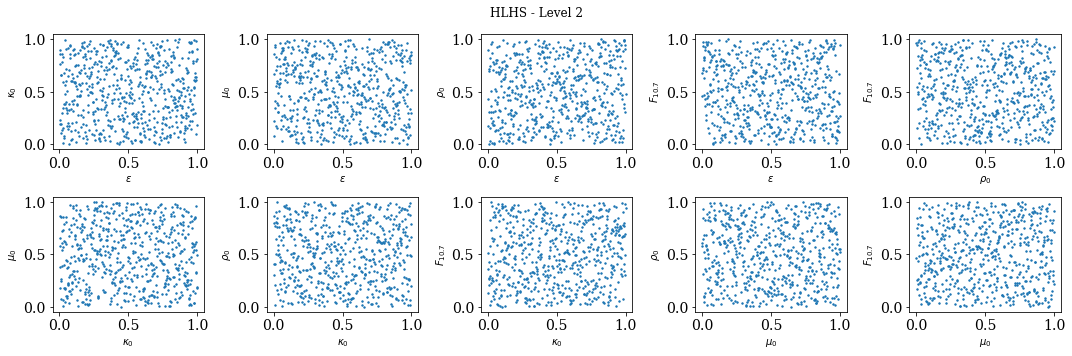

In [11]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(15, 5))
ax[0, 0].scatter(sample2[:, 0], sample2[:, 1], s=2)
ax[0, 0].set_xlabel(r"$\epsilon$")
ax[0, 0].set_ylabel(r"$\kappa_{0}$")

ax[0, 1].scatter(sample2[:, 0], sample2[:, 2], s=2)
ax[0, 1].set_xlabel(r"$\epsilon$")
ax[0, 1].set_ylabel(r"$\mu_{0}$")
ax[0, 1].ticklabel_format(axis='both', style='sci', scilimits=(0,0))

ax[0, 2].scatter(sample2[:, 0], sample2[:, 3], s=2)
ax[0, 2].set_xlabel(r"$\epsilon$")
ax[0, 2].set_ylabel(r"$\rho_{0}$")

ax[0, 3].scatter(sample2[:, 0], sample2[:, 4], s=2)
ax[0, 3].set_xlabel(r"$\epsilon$")
ax[0, 3].set_ylabel(r"$F_{10.7}$")

ax[1, 0].scatter(sample2[:, 1], sample2[:, 2], s=2)
ax[1, 0].set_xlabel(r"$\kappa_{0}$")
ax[1, 0].set_ylabel(r"$\mu_{0}$")
ax[1, 0].ticklabel_format(axis='both', style='sci', scilimits=(0,0))

ax[1, 1].scatter(sample2[:, 1], sample2[:, 3], s=2)
ax[1, 1].set_xlabel(r"$\kappa_{0}$")
ax[1, 1].set_ylabel(r"$\rho_{0}$")

ax[1, 2].scatter(sample2[:, 1], sample2[:, 4], s=2)
ax[1, 2].set_xlabel(r"$\kappa_{0}$")
ax[1, 2].set_ylabel(r"$F_{10.7}$")

ax[1, 3].scatter(sample2[:, 2], sample2[:, 3], s=2)
ax[1, 3].set_xlabel(r"$\mu_{0}$")
ax[1, 3].set_ylabel(r"$\rho_{0}$")

ax[1, 4].scatter(sample2[:, 2], sample2[:, 4], s=2)
ax[1, 4].set_xlabel(r"$\mu_{0}$")
ax[1, 4].set_ylabel(r"$F_{10.7}$")

ax[0, 4].scatter(sample2[:, 3], sample2[:, 4], s=2)
ax[0, 4].set_xlabel(r"$\rho_{0}$")
ax[0, 4].set_ylabel(r"$F_{10.7}$")

fig.suptitle("HLHS - Level 2")
plt.tight_layout()
plt.savefig("../figs/samples_level2.png", dpi=500)
plt.show()

In [12]:
sample3 = np.array(lhs5d.generate(space5d.dimensions, 1800, existing_samples = np.array(sample2)))

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(15, 5))
ax[0, 0].scatter(sample3[:, 0], sample3[:, 1], s=1)
ax[0, 0].set_xlabel(r"$\epsilon$")
ax[0, 0].set_ylabel(r"$\kappa_{0}$")

ax[0, 1].scatter(sample3[:, 0], sample3[:, 2], s=1)
ax[0, 1].set_xlabel(r"$\epsilon$")
ax[0, 1].set_ylabel(r"$\mu_{0}$")
ax[0, 1].ticklabel_format(axis='both', style='sci', scilimits=(0,0))

ax[0, 2].scatter(sample3[:, 0], sample3[:, 3], s=1)
ax[0, 2].set_xlabel(r"$\epsilon$")
ax[0, 2].set_ylabel(r"$\rho_{0}$")

ax[0, 3].scatter(sample3[:, 0], sample3[:, 4], s=1)
ax[0, 3].set_xlabel(r"$\epsilon$")
ax[0, 3].set_ylabel(r"$F_{10.7}$")

ax[1, 0].scatter(sample3[:, 1], sample3[:, 2], s=1)
ax[1, 0].set_xlabel(r"$\kappa_{0}$")
ax[1, 0].set_ylabel(r"$\mu_{0}$")
ax[1, 0].ticklabel_format(axis='both', style='sci', scilimits=(0,0))

ax[1, 1].scatter(sample3[:, 1], sample3[:, 3], s=1)
ax[1, 1].set_xlabel(r"$\kappa_{0}$")
ax[1, 1].set_ylabel(r"$\rho_{0}$")

ax[1, 2].scatter(sample3[:, 1], sample3[:, 4], s=1)
ax[1, 2].set_xlabel(r"$\kappa_{0}$")
ax[1, 2].set_ylabel(r"$F_{10.7}$")

ax[1, 3].scatter(sample3[:, 2], sample3[:, 3], s=1)
ax[1, 3].set_xlabel(r"$\mu_{0}$")
ax[1, 3].set_ylabel(r"$\rho_{0}$")

ax[1, 4].scatter(sample3[:, 2], sample3[:, 4], s=1)
ax[1, 4].set_xlabel(r"$\mu_{0}$")
ax[1, 4].set_ylabel(r"$F_{10.7}$")

ax[0, 4].scatter(sample3[:, 3], sample3[:, 4], s=1)
ax[0, 4].set_xlabel(r"$\rho_{0}$")
ax[0, 4].set_ylabel(r"$F_{10.7}$")

fig.suptitle("HLHS - Level 3")
plt.tight_layout()
plt.savefig("../figs/samples_level3.png", dpi=500)
plt.show()